In [79]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_percentage_error)

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#from imblearn.over_sampling import RandomOverSampler, SMOTE 

# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [39]:
features_num = [
    'Total_flux', 'Peak_flux', 'EBV', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'z_Subaru_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST', 'Mass_median', 'Mass_l68', 'Mass_u68',
]
    

features_cat = [
   "S_Code"
]
y_column = "AGNfrac_af"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [40]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Bootes_preprocessed.csv")

In [41]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

In [48]:
# Dropping required columns
X = data
y = data[y_column]
y = y.fillna(0)
y[y<0] = 0

In [49]:
# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [50]:
# Transforming the data, data that isn't in any of the pipelines is dropped automatically
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [118]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()
clf.fit(X_train, y_train)

MLPRegressor()

In [69]:
clf = RandomForestRegressor(n_estimators=5)
clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5)

In [119]:
def evaluate_model(model, test_features, test_labels):
    """Return the metrics of the predictions"""
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = mean_absolute_percentage_error(test_labels, predictions)
    rmse = mean_squared_error(test_labels, predictions, squared=False)
    r2_score = model.score(test_features, test_labels)
    print('Model Performance %s' % model)
    print('Average Error: {:0.5f}'.format(np.mean(errors)))
    print('RMSE = {:0.5f}'.format(rmse))
    print('MAPE = {:0.5f}%'.format(mape*100))
    print('R^2 = {:0.5f}'.format(r2_score))

In [120]:
evaluate_model(clf, X_test, y_test)

Model Performance MLPRegressor()
Average Error: 0.15233
RMSE = 0.23389
MAPE = 19977187213784452.00000%
R^2 = 0.33085


Text(0, 0.5, 'Predicted')

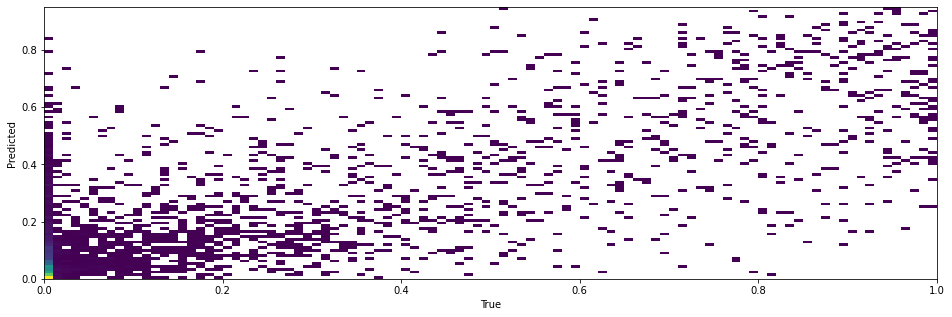

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

# First we plot the Dummy regressor predictions
h = ax.hist2d(y_test, y_pred, bins=(100, 100), cmin=1)##USER INPUT NEEDED##
ax.set_xlabel('True')
ax.set_ylabel('Predicted')